# Master's Thesis: Investigating Maximum Rainfall Trends in Colorado

<b>Institution:</b> University of Georgia <br>
<b>Department:</b> Statistics <br>
<b>Student:</b> Jeremy Mulcahey <br>
<b>Advisor:</b> Dr. Lynne Seymour <br>
<b>Last Edit:</b> 9/27/2016

Section 0: Preparing data <br>
Section 1: Mean<br>
Section 2: Variance

##  Section 0: Preparing data

In [1]:
require(fitdistrplus); # required for parameter estimation
require(caTools);      # required for smoothing
require(repr);         # required for resizing plots in IRKernel
require("IRdisplay");  # graphic embedding
require(MASS);         # testing

Loading required package: fitdistrplus
Loading required package: MASS
Loading required package: survival
Loading required package: caTools
Loading required package: repr
Loading required package: IRdisplay


In [2]:
# establish working directorys
setwd("C:/Users/jerem/Desktop/UGA/Master'sThesis/")

Data files for individual station names.

In [3]:
data = read.csv(file = "data/EVERGREEN_MonMax_GHCN.csv", head=T)

Adjust the data for later use.

In [4]:
# Create an index as x - used as needed
month = seq(1,nrow(data),by=1)
data = cbind(data,month)

# first year of the data (changes by station name)
firstYear = data$YEAR[1]

# station name for plotting
stationName = as.character(data$STATION_NAME[1])

# -999 messed with the plotting - change to NA
data[data==-999] = NA

sum(is.na(data)) #print number of missing values

[1] 46

Check number of years in the data set.

In [5]:
data$YEAR[nrow(data)]-firstYear

[1] 52

In [6]:
table(data$MONTH)


 1  2  3  4  5  6  7  8  9 10 11 12 
53 53 53 53 53 53 53 53 53 53 53 53 

Make a data frame of all the 10 year periods following the first year for data collected at the station.

In [7]:
#create the first decade (first year and the following 9 years)
max_PRCP = data.frame(data[which(data$YEAR < (firstYear + 10)),6])

# add all the subsequent decades to the data frame incrementing by 1 year at a time
for(year in c((data$YEAR[1] + 1):2005)){
    max_PRCP = cbind(max_PRCP,data[which(data$YEAR >= year & data$YEAR < year+10),6])
}

# name the columns as the first year of the observed 10 year periods
colnames(max_PRCP) = as.character(c(firstYear:2005))

# set the missing values to NA
max_PRCP[max_PRCP==-999] = NA

## Section 1: Mean

In [8]:
options(repr.plot.width=9, repr.plot.height=5) #reduces the plot sizes

In [9]:
# create for maximum rainfall
maxTS = ts(data$Max.PRCP, start = firstYear, freq=12)

# create regression line
reg = lm(Max.PRCP. ~ month, data=data)

In [18]:
smooth = runmean(data$Max.PRCP., 120)

In [19]:
smoothTS = ts(smooth, start=firstYear, freq=12)

In [20]:
maxObs = max(na.omit(data$Max.PRCP.));maxObs

[1] 937

In [21]:
which(data$Max.PRCP.==maxObs)

[1] 89

In [107]:
data[which(data$Max.PRCP.==maxObs),]

,STATION,STATION_NAME,YEAR,MONTH,Obs,Max.PRCP.,month,box
89,GHCND:USC00052790,EVERGREEN CO US,1969,5,31,937,89,0


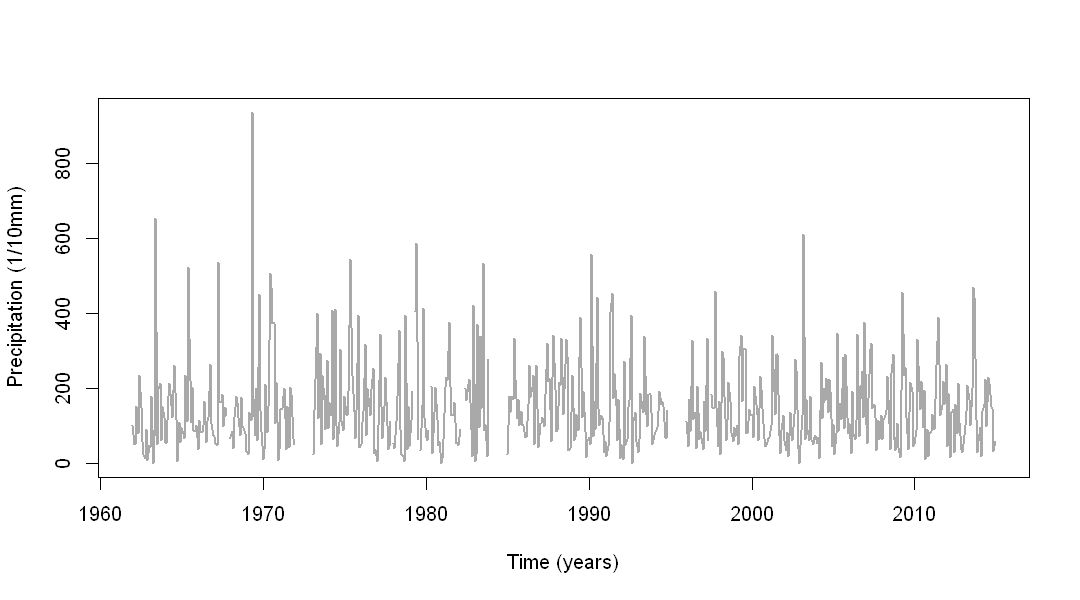

In [23]:
plot(maxTS, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     #ylim=c(0,1250)
    )

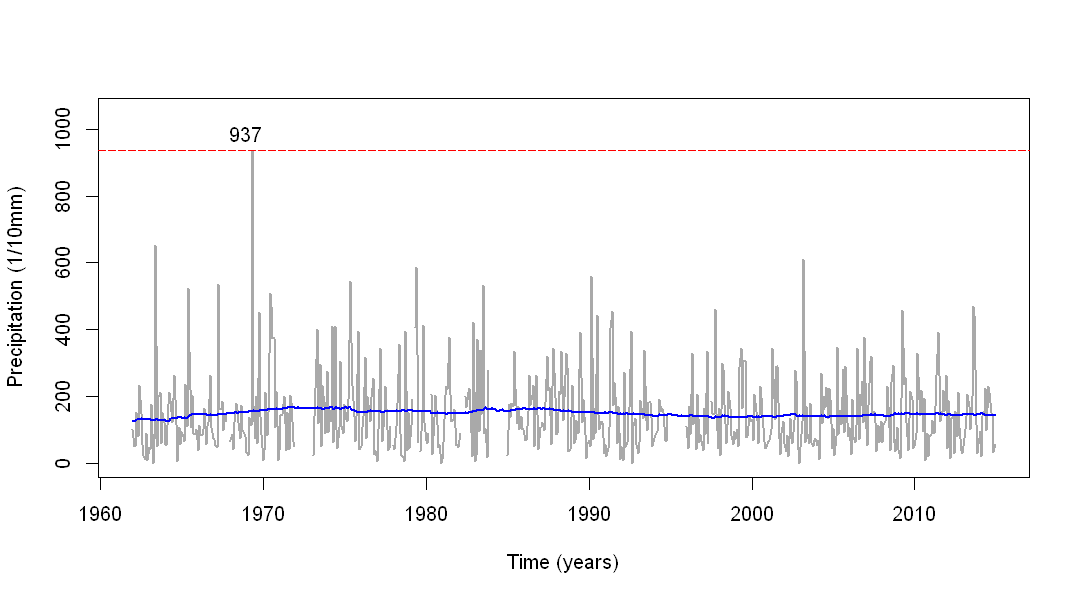

In [26]:
plot(maxTS, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,1050))
abline(h=maxObs, col="red", lwd=.5, lty=5)
points(smoothTS, col=4, type="l", lwd=2)
text(1969,maxObs+50,
           sprintf("%i",maxObs))

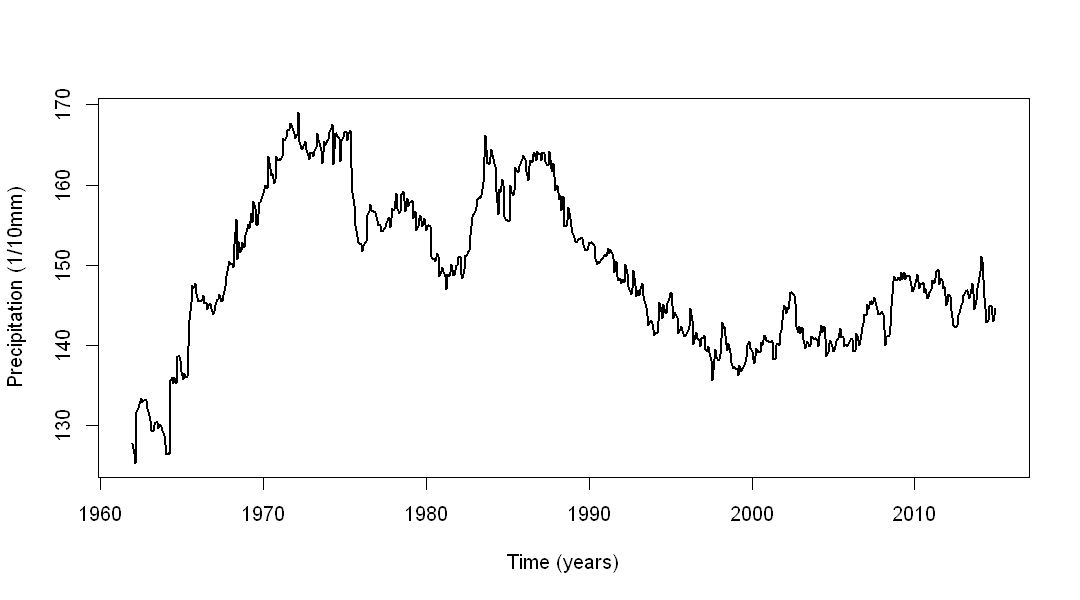

In [27]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 1
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )


In [32]:
smoothALL = runmean(data$Max.PRCP., length(data$Max.PRCP.)/2)

In [33]:
length(smoothALL)

[1] 636

In [34]:
smoothALLTS = ts(smoothALL, start = firstYear, freq=12)

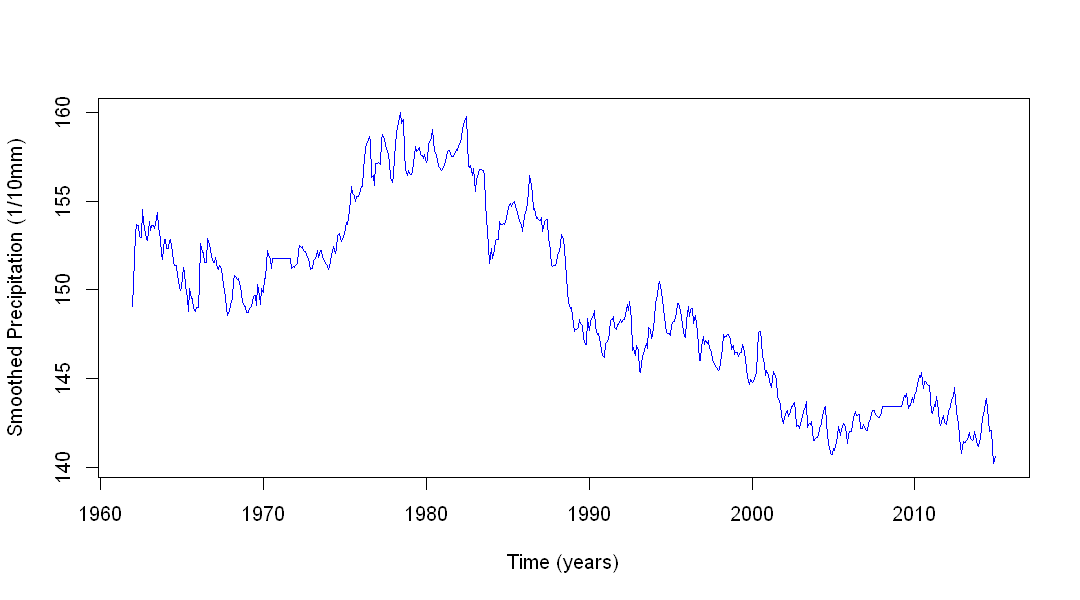

In [35]:
plot(smoothALLTS, type="l", col="blue", ylab="Smoothed Precipitation (1/10mm)", xlab="Time (years)")

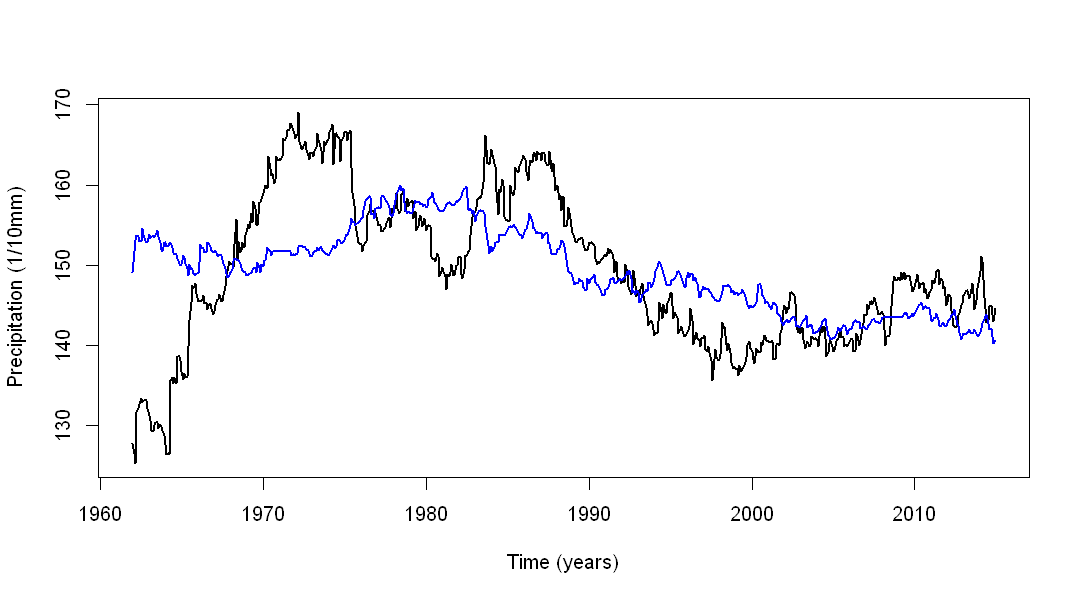

In [36]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 1
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
lines(smoothALLTS, col=4, lwd=2)

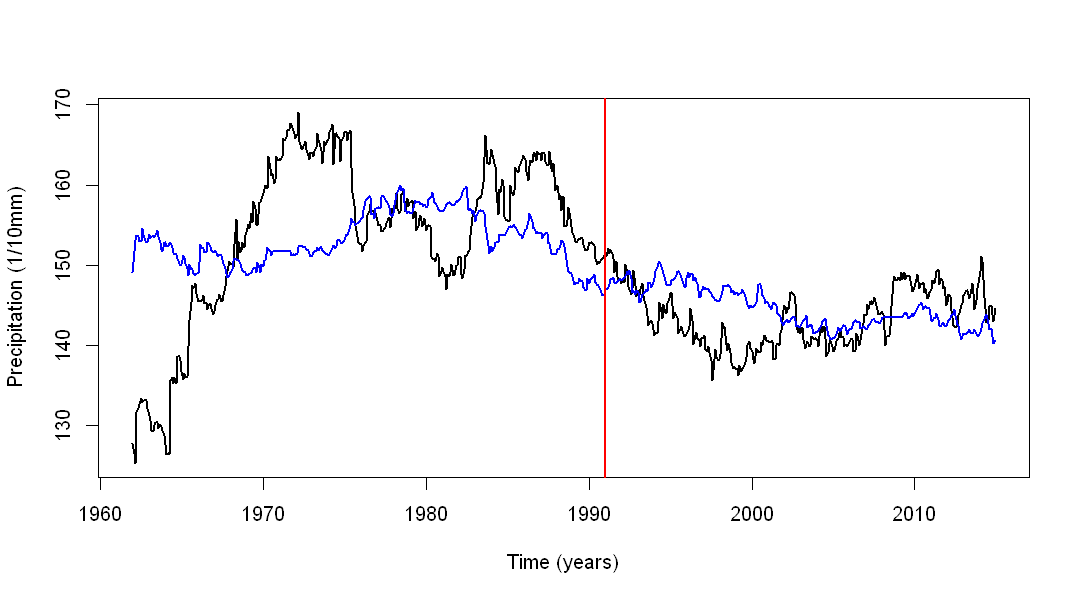

In [50]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 1
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
lines(smoothALLTS, col=4, lwd=2)
abline(v=1991,col=2,lwd=2)

### Change point detection for mean signal

In [38]:
require(changepoint)

Loading required package: changepoint
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Successfully loaded changepoint package version 2.2.1
 NOTE: Predefined penalty values have changed.  Previous penalty values with a postfix 1 i.e. SIC1 are now without i.e. SIC and previous penalties without a postfix i.e. SIC are now with a postfix 0 i.e. SIC0. See NEWS and help files for further details.


In [39]:
cpt.mean(smoothTS)

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              date version data.set cpttype method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Tue Sep 13 17:22:34 2016 

summary(.)  :
----------
Created Using changepoint version 2.2.1 
Changepoint type      : Change in mean 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 19.3656 
Minimum Segment Length : 1 
Maximum no. of cpts   : 1 
Changepoint Locations : 358 

In [56]:
cp=358

In [109]:
data[cp,]

,STATION,STATION_NAME,YEAR,MONTH,Obs,Max.PRCP.,month,box
358,GHCND:USC00052790,EVERGREEN CO US,1991,10,31,61,358,1


In [70]:
cpYear = 1991

In [57]:
smoothTS[cp]

[1] 148.6729

In [44]:
cp/12

[1] 29.83333

In [48]:
firstYear

[1] 1962

October 91?

In [45]:
shapiro.test(smoothTS)


	Shapiro-Wilk normality test

data:  smoothTS
W = 0.97656, p-value = 1.466e-08


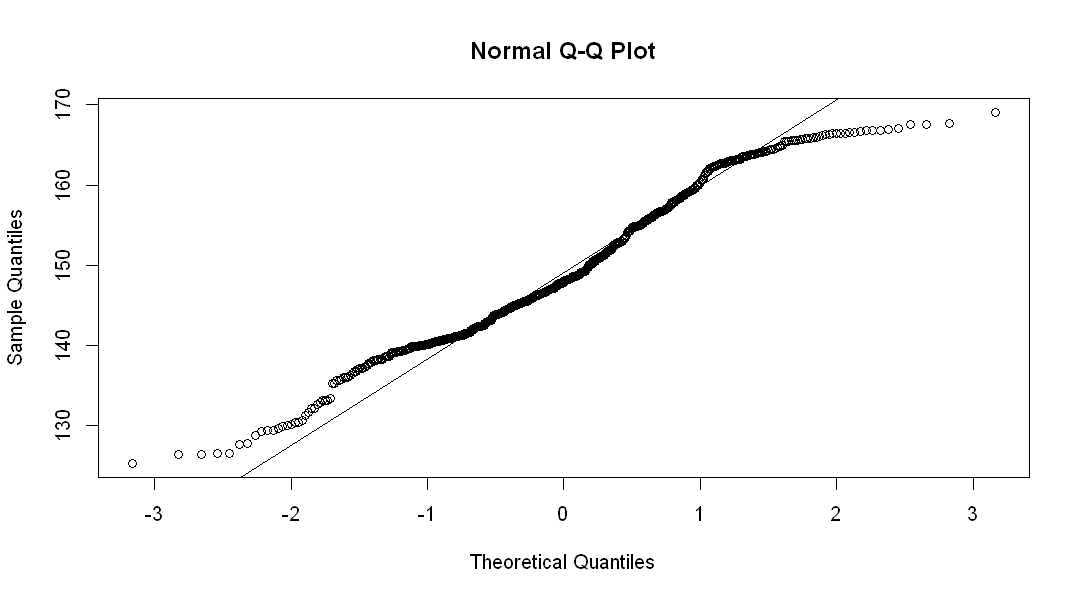

In [46]:
qqnorm(smoothTS);qqline(smoothTS)

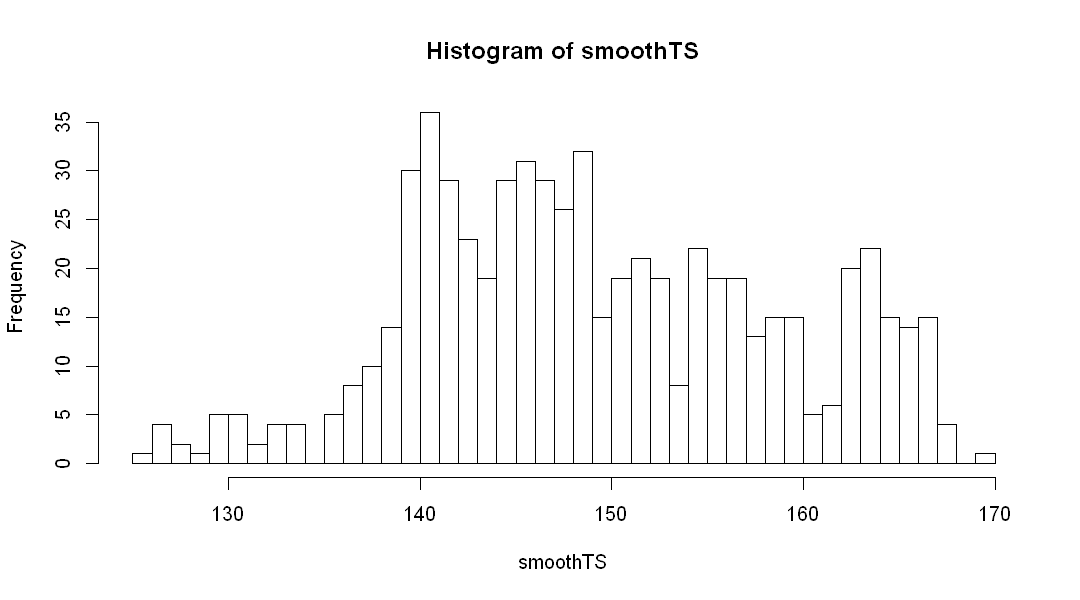

In [51]:
hist(smoothTS,breaks=40)

In [60]:
smoothTS[(cp-10):(cp+10)]

[1] 151.2617 151.3551 151.1402 152.0841 151.4206 152.0374 151.4953 150.8785
 [9] 149.0748 150.5234 148.6729 148.1028 148.3458 147.7009 148.2430 147.8879
[17] 150.0935 148.9533 147.3396 147.0283 146.3113

In [61]:
anotherTS = smoothTS

In [64]:
mean1sthalf = mean(smoothTS[1:cp])
mean2ndhalf = mean(smooth[(cp+1):length(smoothTS)])

In [65]:
anotherTS[1:cp] = mean1sthalf
anotherTS[(cp+1):length(smoothTS)] = mean2ndhalf

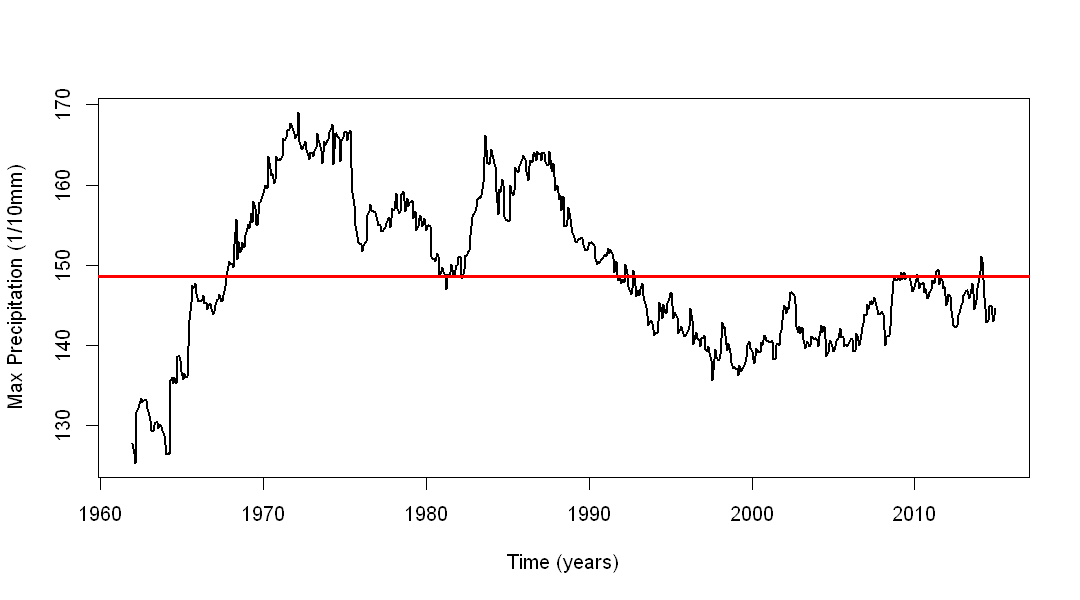

In [68]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 1 #main="Smoothed 24 hour max rainfall from 1898 to 2012"
    )
    #points(rollLarge, type="l", col=4)
    #egend(0,200, c("300 window","", "900 window"), col=c(2,0,4), lty=c(1,0,1), bty="n")
    abline(h=mean(na.omit(data$Max.PRCP.)),col=2,lwd=3)

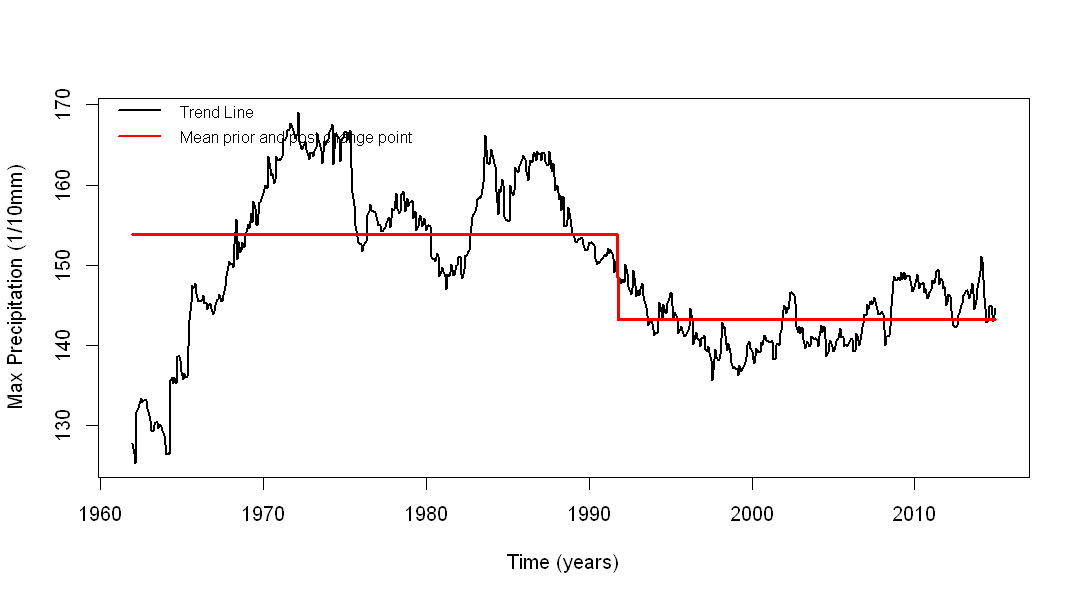

In [69]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 1, #main="Smoothed 24 hour max rainfall from 1898 to 2012"
    )
    #points(rollLarge, type="l", col=4)
    #egend(0,200, c("300 window","", "900 window"), col=c(2,0,4), lty=c(1,0,1), bty="n")
    lines(anotherTS,col=2,lwd=3)
    legend("topleft",c("Trend Line","","Mean prior and post change point"), lty=c(1,0,1), lwd=c(2,0,2), col=c(1,0,2),
    bty="n", cex = .8, pt.cex=.8)

In [71]:
data["box"] = as.numeric(data$YEAR>=cpYear)

In [73]:
mean(na.omit(data[which(data$box == 0),"Max.PRCP."]))

[1] 154.1108

In [74]:
mean(na.omit(data[which(data$box == 1),"Max.PRCP."]))

[1] 142.1934

Box plots with noise from the event

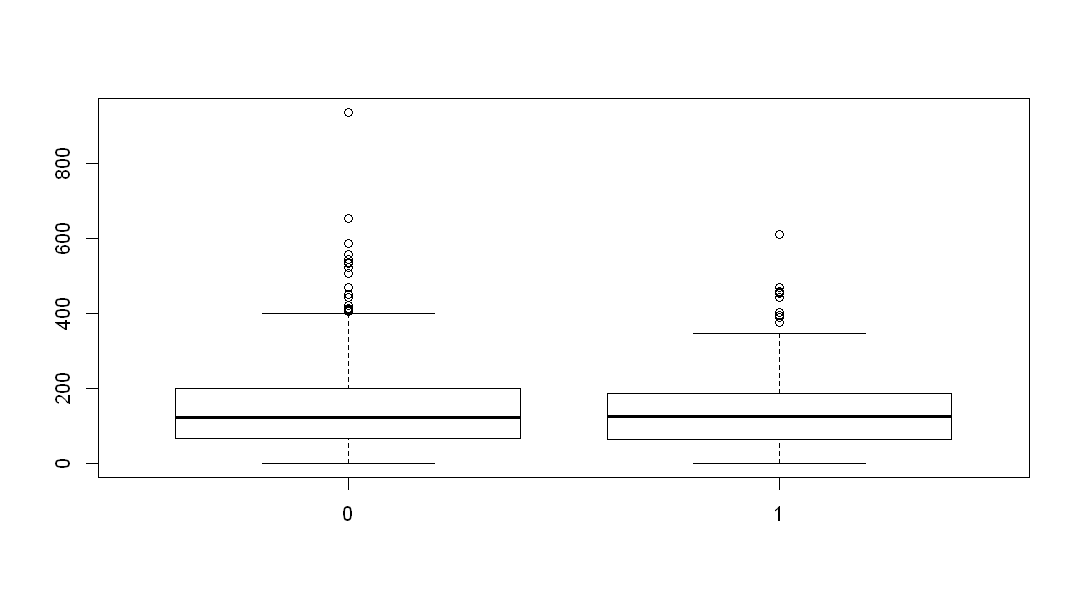

In [75]:
boxplot(data$Max.PRCP.~data$box)

A little less noise in the box plots by removing the event

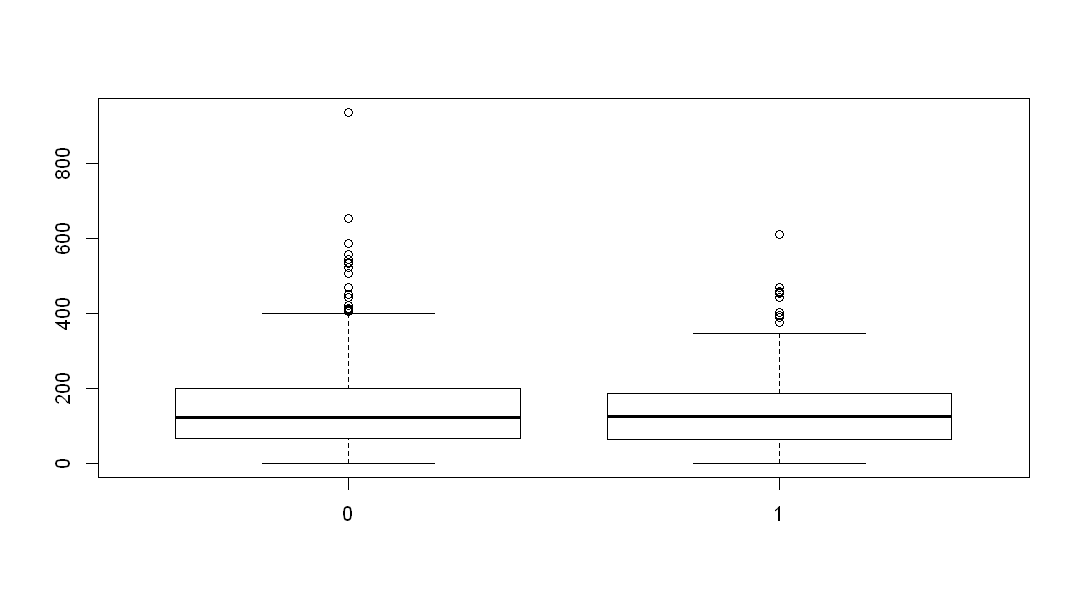

In [76]:
boxplot(data$Max.PRCP.~data$box)

In [92]:
indicator = c(rep(0,cp),rep(1,(length(smoothTS)-cp)))

In [93]:
meansBox = as.data.frame(cbind(smoothTS,indicator))

In [96]:
meansBoxSea = as.data.frame(cbind(smoothTS, rep(c(1,2,3,4,5,6,7,8,9,10,11,12),length(smoothTS)/12)))

In [97]:
names(meansBoxSea) = c("precipitation","month")

Now, can see the difference in the mean of the smoothed signals, however, given the actual variance of the data, the significance here is debatable - not to mention the independence assumption is not valid.

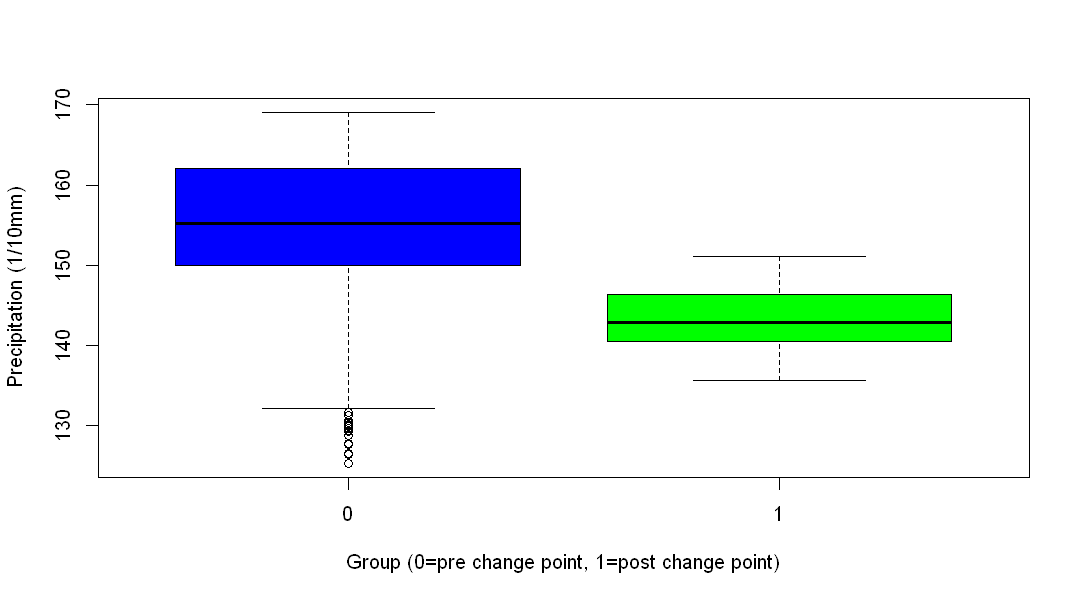

In [98]:
boxplot(meansBox$smoothTS ~ meansBox$indicator, xlab = "Group (0=pre change point, 1=post change point)",
       col = c("blue","green"), ylab = "Precipitation (1/10mm)")

#  Variances

In [99]:
vars1 = NULL
for(i in 1:(length(max_PRCP))){
    vars1 = c(vars1,var(na.omit(max_PRCP[,i])))
}
vars1TS = ts(vars1, start = firstYear)

In [100]:
vars1TS

Time Series:
Start = 1962 
End = 2005 
Frequency = 1 
 [1] 18771.440 19988.535 18558.476 19615.877 20256.490 20464.192 19714.157
 [8] 21117.280 17657.005 15021.591 15500.086 15212.369 16516.398 16621.206
[15] 14388.634 14219.780 14056.874 13275.458 10934.366 12753.134 13867.713
[22] 14008.615 11732.376 10898.977 11534.497 11631.983 12354.185 11910.661
[29] 11943.054  9585.455  8598.451  8170.344 10040.245 10449.899 10350.517
[36] 10872.260 10088.434 10020.218 10351.878 10746.291 10653.650 10367.606
[43] 10065.872  9921.543

In [101]:
rollSmall = ts(runmean(vars1TS,15),start=firstYear)
rollSmall2 = ts(runmean(vars1TS,30),start=firstYear)
rollSmall3 = ts(runmean(vars1TS,50),start=firstYear)

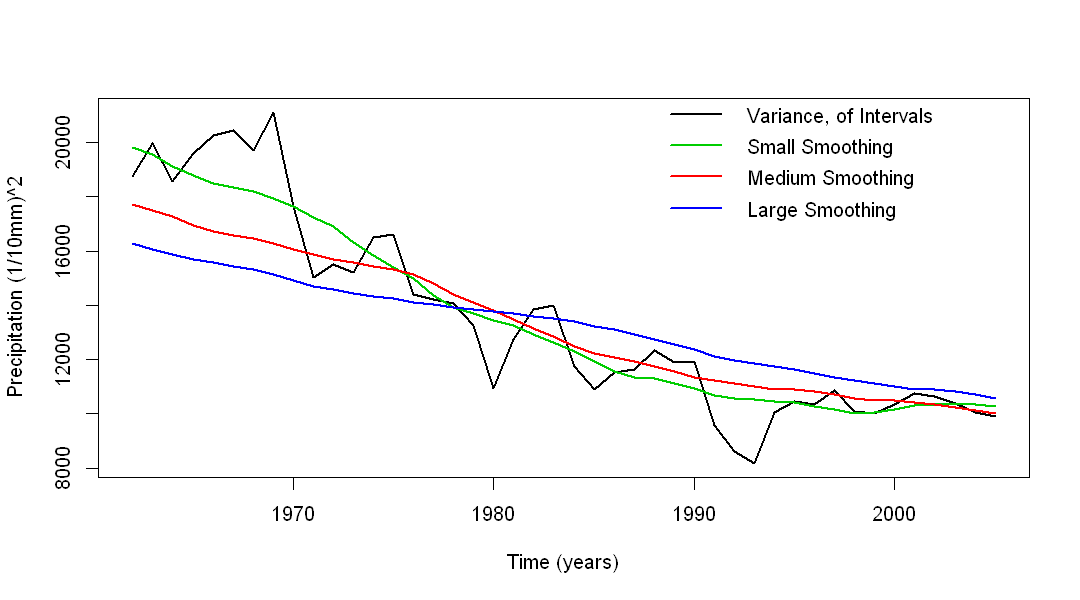

In [104]:
plot(vars1TS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)^2", col = 1)
lines(rollSmall, col=3,lwd=2)
lines(rollSmall2, col=2,lwd=2)
lines(rollSmall3, col=4,lwd=2)
legend("topright",c("Variance, of Intervals","","Small Smoothing", "","Medium Smoothing","","Large Smoothing"),
      col = c(1,0,3,0,2,0,4), lty = c(1,0,1,0,1,0,1), lwd=c(2,2,2,2), bty="n")

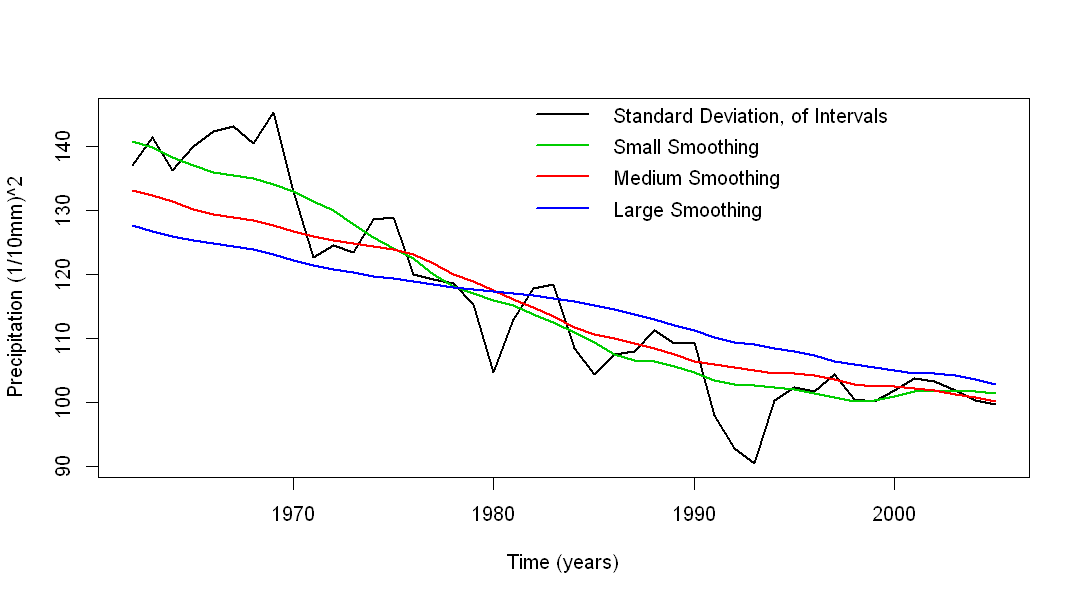

In [106]:
plot(sqrt(vars1TS), type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)^2", col = 1)
lines(sqrt(rollSmall), col=3,lwd=2)
lines(sqrt(rollSmall2), col=2,lwd=2)
lines(sqrt(rollSmall3), col=4,lwd=2)
legend("topright",c("Standard Deviation, of Intervals","","Small Smoothing", "","Medium Smoothing","","Large Smoothing"),
      col = c(1,0,3,0,2,0,4), lty = c(1,0,1,0,1,0,1), lwd=c(2,2,2,2), bty="n")